# Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import pickle
import joblib
# import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,  roc_auc_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Data Acquisition

In [143]:
# loading csv data to panda dataframe
heart_data = pd.read_csv('/content/heart_disease_uci.csv')

In [40]:
# printing first 5 values of the dataset
heart_data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


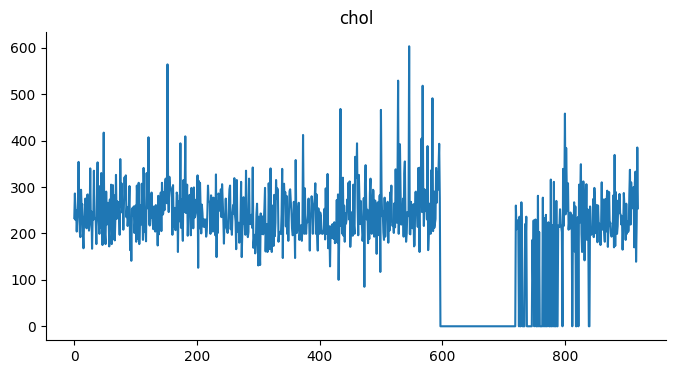

In [139]:
# @title chol

from matplotlib import pyplot as plt
heart_data['chol'].plot(kind='line', figsize=(8, 4), title='chol')
plt.gca().spines[['top', 'right']].set_visible(False)

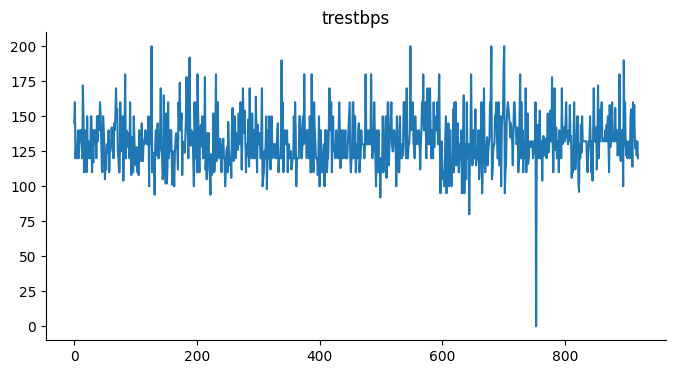

In [138]:
# @title trestbps

from matplotlib import pyplot as plt
heart_data['trestbps'].plot(kind='line', figsize=(8, 4), title='trestbps')
plt.gca().spines[['top', 'right']].set_visible(False)

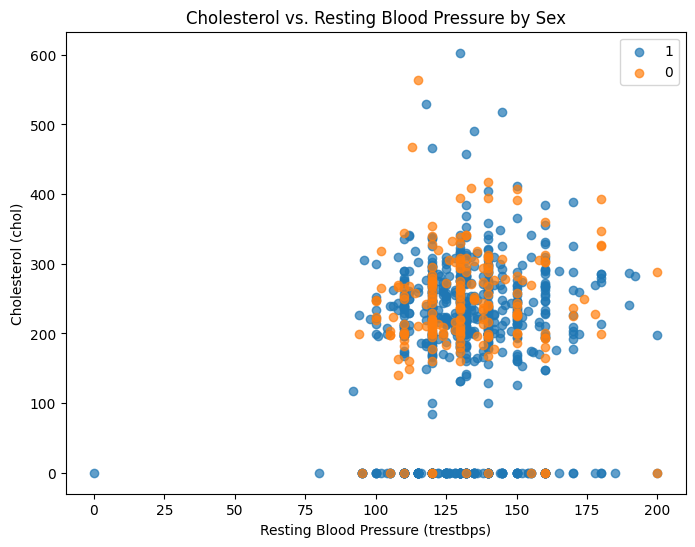

In [ ]:
# @title Cholesterol vs. Resting Blood Pressure by Sex

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for sex in heart_data['sex'].unique():
    subset = heart_data[heart_data['sex'] == sex]
    plt.scatter(subset['trestbps'], subset['chol'], label=sex, alpha=0.7)
plt.title('Cholesterol vs. Resting Blood Pressure by Sex')
plt.xlabel('Resting Blood Pressure (trestbps)')
plt.ylabel('Cholesterol (chol)')
_ = plt.legend()

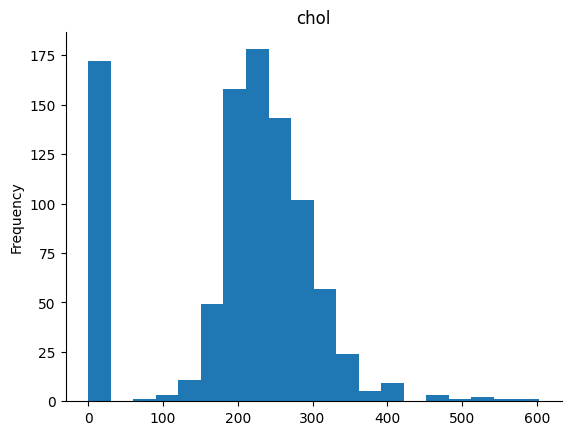

In [136]:
# @title chol

from matplotlib import pyplot as plt
heart_data['chol'].plot(kind='hist', bins=20, title='chol')
plt.gca().spines[['top', 'right',]].set_visible(False)

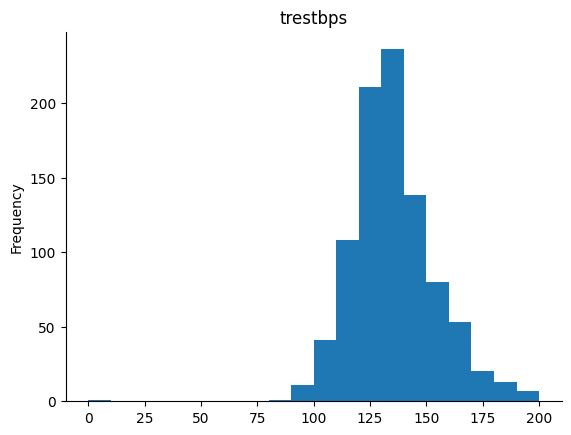

In [135]:
# @title trestbps

from matplotlib import pyplot as plt
heart_data['trestbps'].plot(kind='hist', bins=20, title='trestbps')
plt.gca().spines[['top', 'right',]].set_visible(False)

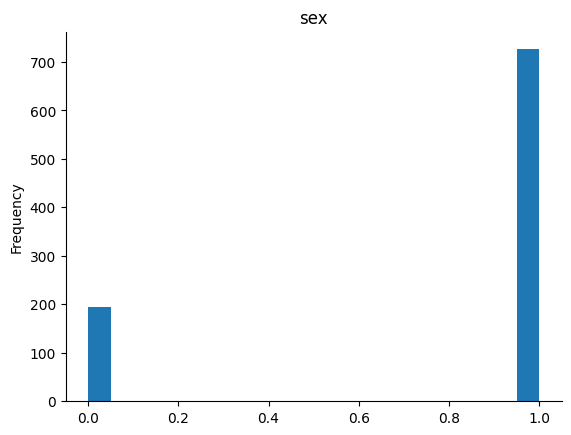

In [134]:
# @title sex

from matplotlib import pyplot as plt
heart_data['sex'].plot(kind='hist', bins=20, title='sex')
plt.gca().spines[['top', 'right',]].set_visible(False)

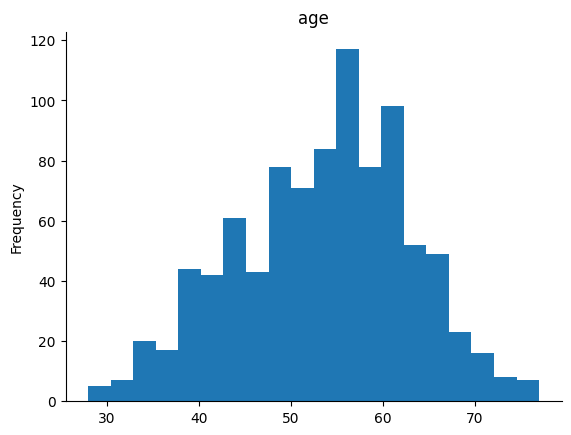

In [133]:
# @title age

from matplotlib import pyplot as plt
heart_data['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [41]:
# printing last 5 rows of the dataset
heart_data.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [42]:
# number of rows and coloums in the dataset
heart_data.shape

(920, 16)

In [43]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalach   865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  target    920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [44]:
# basic descriptive
heart_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,920.0,460.500000,265.725422,1.0,230.75,460.5,690.25,920.0
age,920.0,53.510870,9.424685,28.0,47.00,54.0,60.00,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.00,130.0,140.00,200.0
chol,890.0,199.130337,110.780810,0.0,175.00,223.0,268.00,603.0
thalach,865.0,137.545665,25.926276,60.0,120.00,140.0,157.00,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.00,0.5,1.50,6.2
ca,309.0,0.676375,0.935653,0.0,0.00,0.0,1.00,3.0
target,920.0,0.995652,1.142693,0.0,0.00,1.0,2.00,4.0


from matplotlib import pyplot as plt
_df_0['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='count', y='mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='min', y='25%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

# Filtering Dataset

In [45]:
# checking for missing values
heart_data.isnull().sum()/len(heart_data)*100

,0
id,0.000000
age,0.000000
sex,0.000000
dataset,0.000000
cp,0.000000
trestbps,6.413043
chol,3.260870
fbs,9.782609
restecg,0.217391
thalach,5.978261


Data Visualization

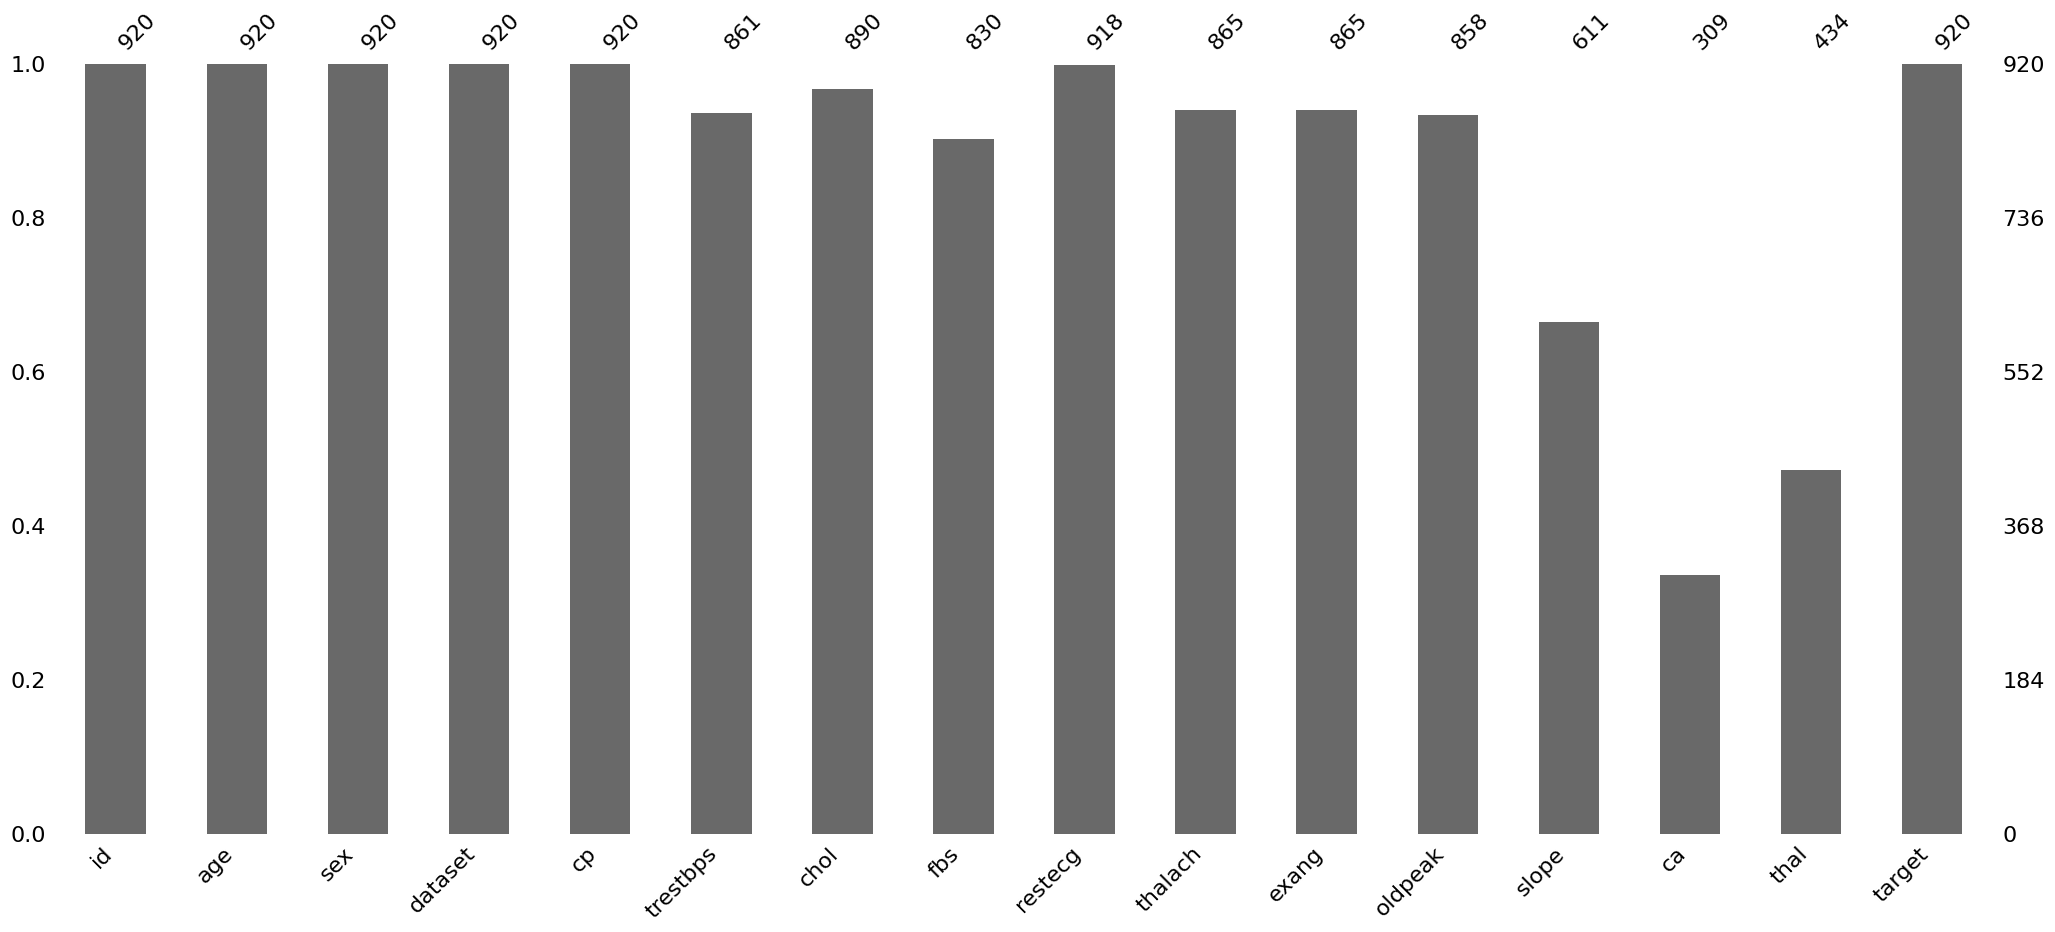

In [46]:
# how to visualize relative of the missingness coloums
import missingno as msno
msno.bar(heart_data)
plt.show()

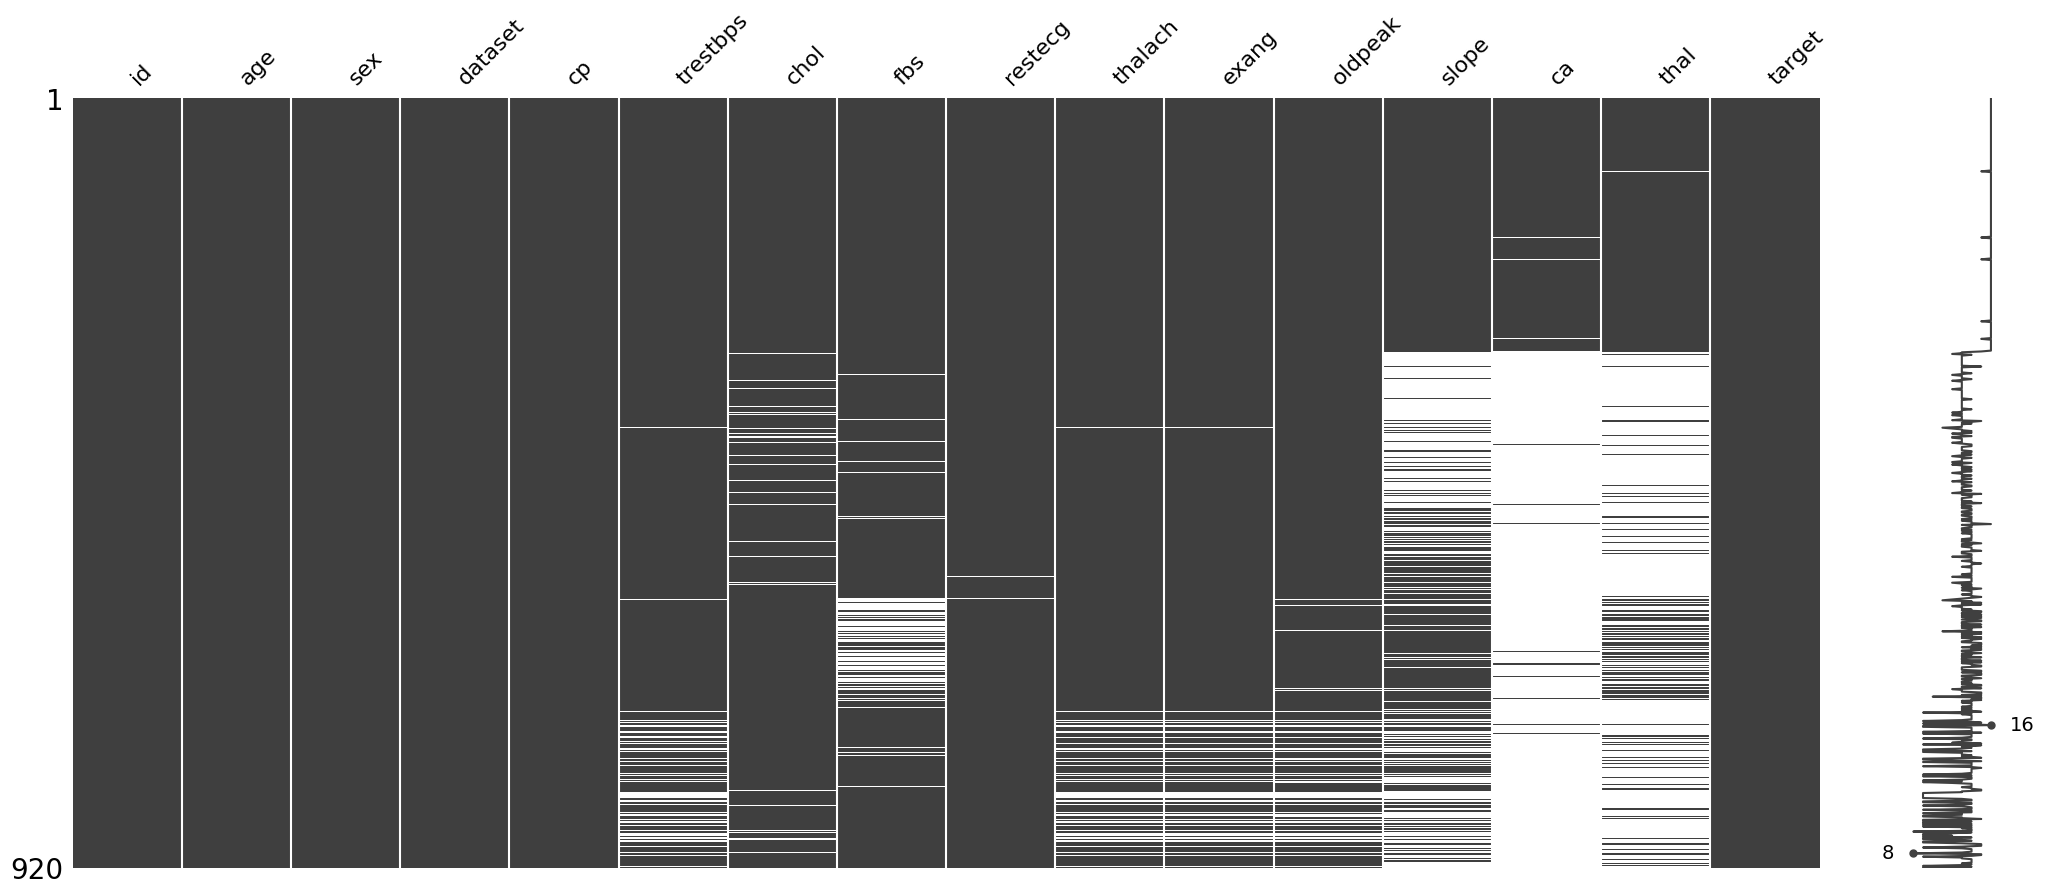

In [10]:
msno.matrix(heart_data)
plt.show()

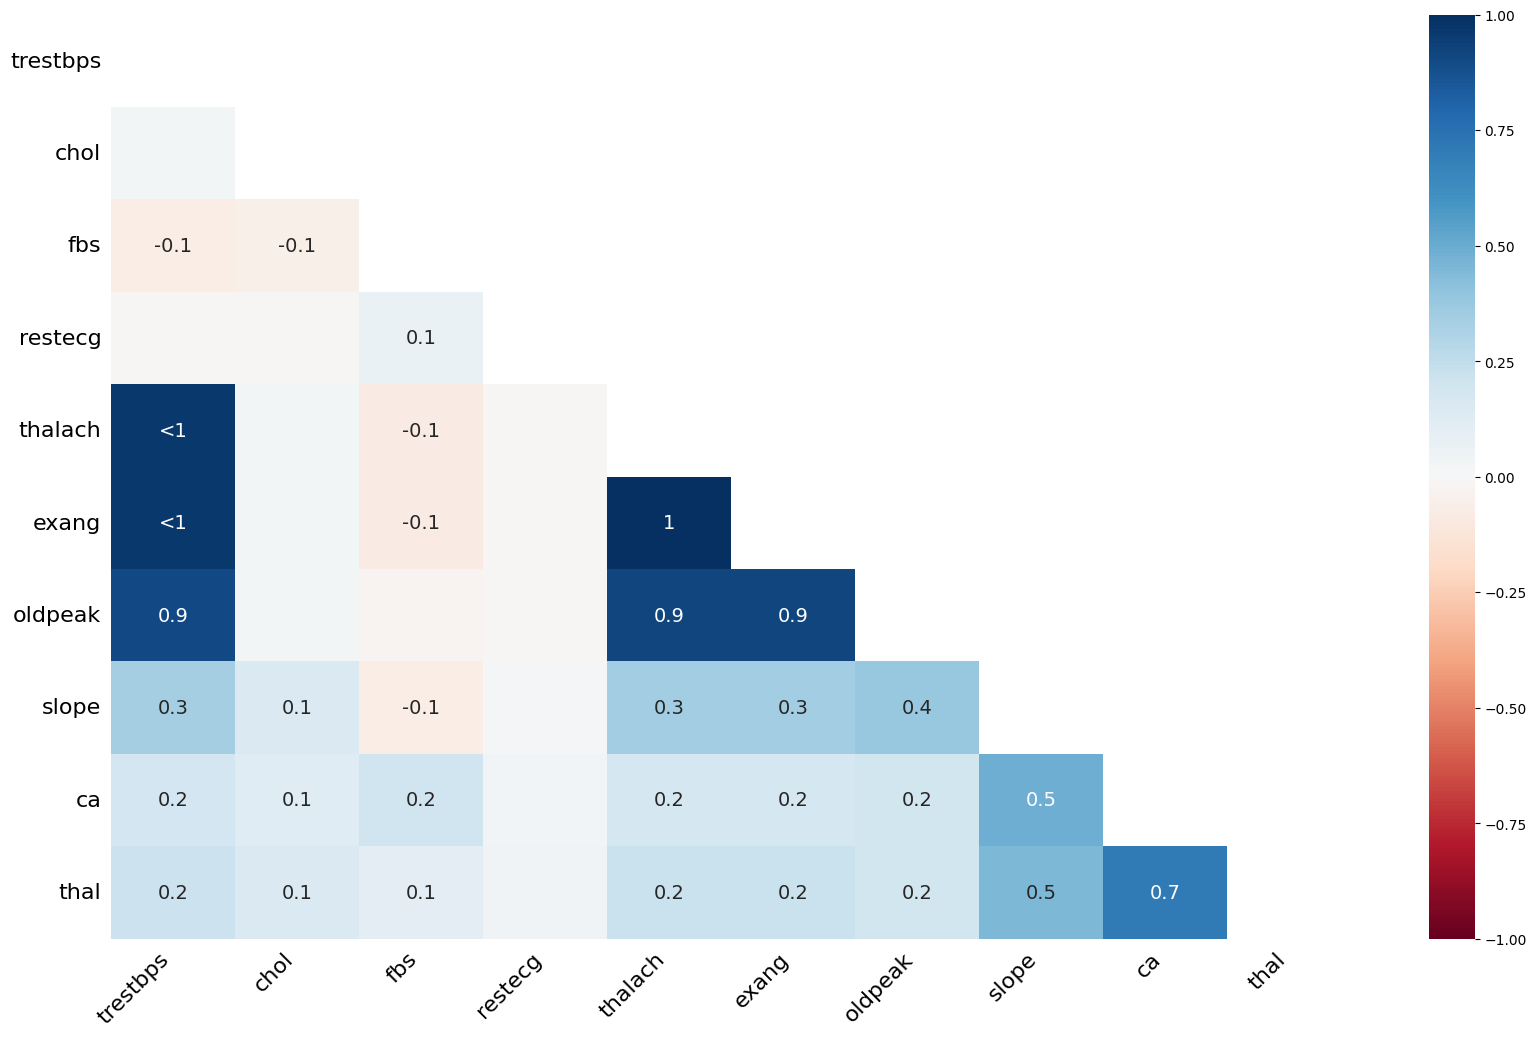

In [11]:
msno.heatmap(heart_data)
plt.show()

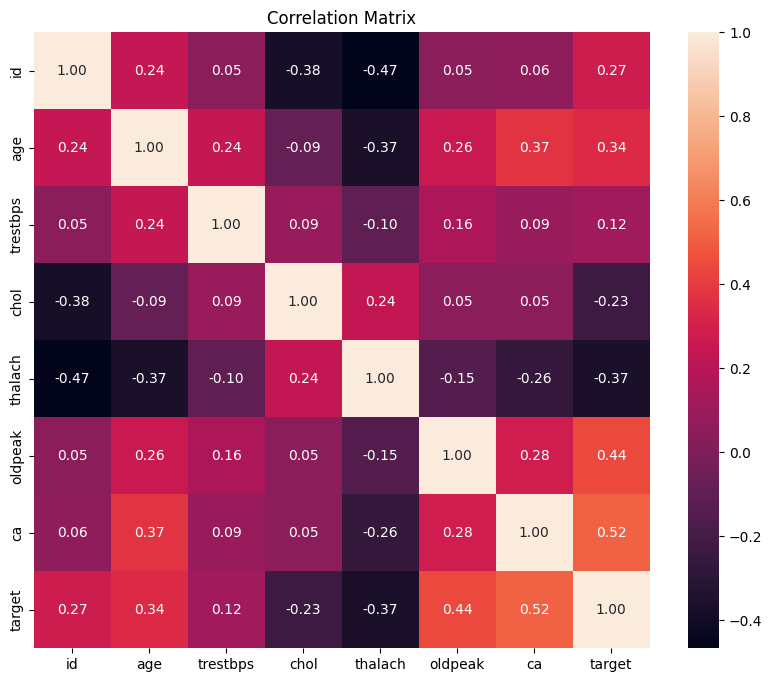

In [144]:
df_numeric = heart_data.select_dtypes(include=['number'])

corr = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

Handling Missing Values

In [147]:
# Drop Columns with High Missing Values and Unwanted Columns
heart_data.drop(['id','dataset','ca', 'thal'], axis=1, inplace=True)

In [148]:
# mpute Missing Values for Other Columns
heart_data['trestbps'] = heart_data['trestbps'].fillna(heart_data['trestbps'].mean())
heart_data['chol'] = heart_data['chol'].fillna(heart_data['chol'].mean())
heart_data['fbs'] = heart_data['fbs'].fillna(heart_data['fbs'].mean())
heart_data['thalach'] = heart_data['thalach'].fillna(heart_data['thalach'].mean())
heart_data['exang'] = heart_data['exang'].fillna(heart_data['exang'].mean())
heart_data['oldpeak'] = heart_data['oldpeak'].fillna(heart_data['oldpeak'].mean())

In [149]:
# Handle Missing Values in Categorical Columns
# For the slope column (33.59% missing), fill missing values with the mode.
heart_data['slope'] = heart_data['slope'].fillna(heart_data['slope'].mode()[0])

In [150]:
# Normalize or Standardize Numerical Columns
scaler = StandardScaler()
heart_data[['trestbps', 'chol', 'thalach']] = scaler.fit_transform(heart_data[['trestbps', 'chol', 'thalach']])

In [151]:
# Convert categorical variables into numerical values using one-hot encoding
heart_data = pd.get_dummies(heart_data, columns=['cp', 'restecg', 'slope'])

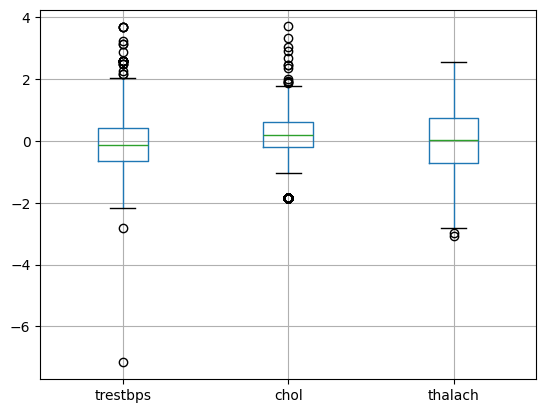

In [152]:
# Seeing normalized data
heart_data.boxplot(column=['trestbps', 'chol', 'thalach'])
plt.show()

Checking New Revised Filtered Data

In [96]:
# number of rows and coloums in the dataset
heart_data.shape

(920, 19)

In [97]:
# checking for missing values
heart_data.isnull().sum()/len(heart_data)*100

,0
age,0.0
sex,0.0
trestbps,0.0
chol,0.0
fbs,0.0
thalach,0.0
exang,0.0
oldpeak,0.0
target,0.0
cp_asymptomatic,0.0


In [98]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       920 non-null    int64  
 1   sex                       920 non-null    object 
 2   trestbps                  920 non-null    float64
 3   chol                      920 non-null    float64
 4   fbs                       920 non-null    object 
 5   thalach                   920 non-null    float64
 6   exang                     920 non-null    object 
 7   oldpeak                   920 non-null    float64
 8   target                    920 non-null    int64  
 9   cp_asymptomatic           920 non-null    bool   
 10  cp_atypical angina        920 non-null    bool   
 11  cp_non-anginal            920 non-null    bool   
 12  cp_typical angina         920 non-null    bool   
 13  restecg_lv hypertrophy    920 non-null    bool   
 14  restecg_no

In [99]:
# printing first 5 values of the dataset
heart_data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping
0,63,Male,145.0,233.0,True,150.0,False,2.3,0,False,False,False,True,True,False,False,True,False,False
1,67,Male,160.0,286.0,False,108.0,True,1.5,2,True,False,False,False,True,False,False,False,True,False
2,67,Male,120.0,229.0,False,129.0,True,2.6,1,True,False,False,False,True,False,False,False,True,False
3,37,Male,130.0,250.0,False,187.0,False,3.5,0,False,False,True,False,False,True,False,True,False,False
4,41,Female,130.0,204.0,False,172.0,False,1.4,0,False,True,False,False,True,False,False,False,False,True


#Generating Machine Learning Model

IMBALANCE IN TARGET VARIABLE

In [100]:
# checking the distribution of Target Variable
heart_data['target'].value_counts(normalize = True)

,proportion
target,
0,0.446739
1,0.288043
2,0.118478
3,0.116304
4,0.030435


*   0: "Healthy: No signs of heart disease"
*   1: "Early Stage: Potential heart issues, no significant symptoms"
*   2: "Mild Symptoms: Minor heart disease indicators present"
*   3: "Advanced Warning: Significant heart disease risk"
*   4: "Severe: High risk of congestive heart failure"

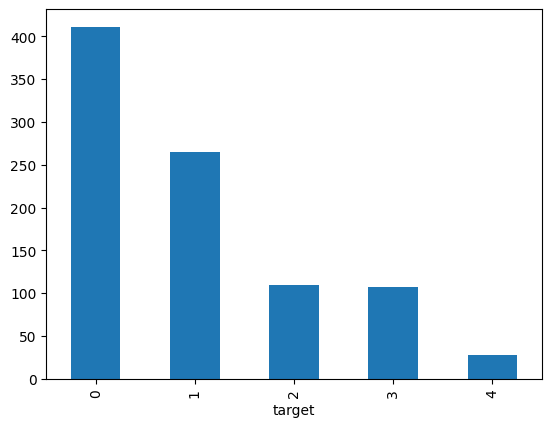

In [56]:
# distribution of target variable
heart_data['target'].value_counts().plot(kind = 'bar')
plt.show()

In [154]:
# Convert object and bool columns to numeric
for col in heart_data.select_dtypes(include=['object', 'bool']).columns:
  heart_data[col] = heart_data[col].astype('category').cat.codes

In [155]:
# Prepare the data
X = heart_data.drop('target', axis=1)
y = heart_data['target']

# dimensions of matrices
X.shape , y.shape

((920, 18), (920,))

In [156]:
# Feature Engineering Example
heart_data['age_trestbps_interaction'] = heart_data['age'] * heart_data['trestbps']

In [103]:
# Original feature names before PolynomialFeatures
original_feature_names = X.columns.tolist()

In [28]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       920 non-null    int64  
 1   sex                       920 non-null    int8   
 2   trestbps                  920 non-null    float64
 3   chol                      920 non-null    float64
 4   fbs                       920 non-null    int8   
 5   thalach                   920 non-null    float64
 6   exang                     920 non-null    int8   
 7   oldpeak                   920 non-null    float64
 8   target                    920 non-null    int64  
 9   cp_asymptomatic           920 non-null    int8   
 10  cp_atypical angina        920 non-null    int8   
 11  cp_non-anginal            920 non-null    int8   
 12  cp_typical angina         920 non-null    int8   
 13  restecg_lv hypertrophy    920 non-null    int8   
 14  restecg_no

<Axes: title={'center': 'Correlation with Target'}>

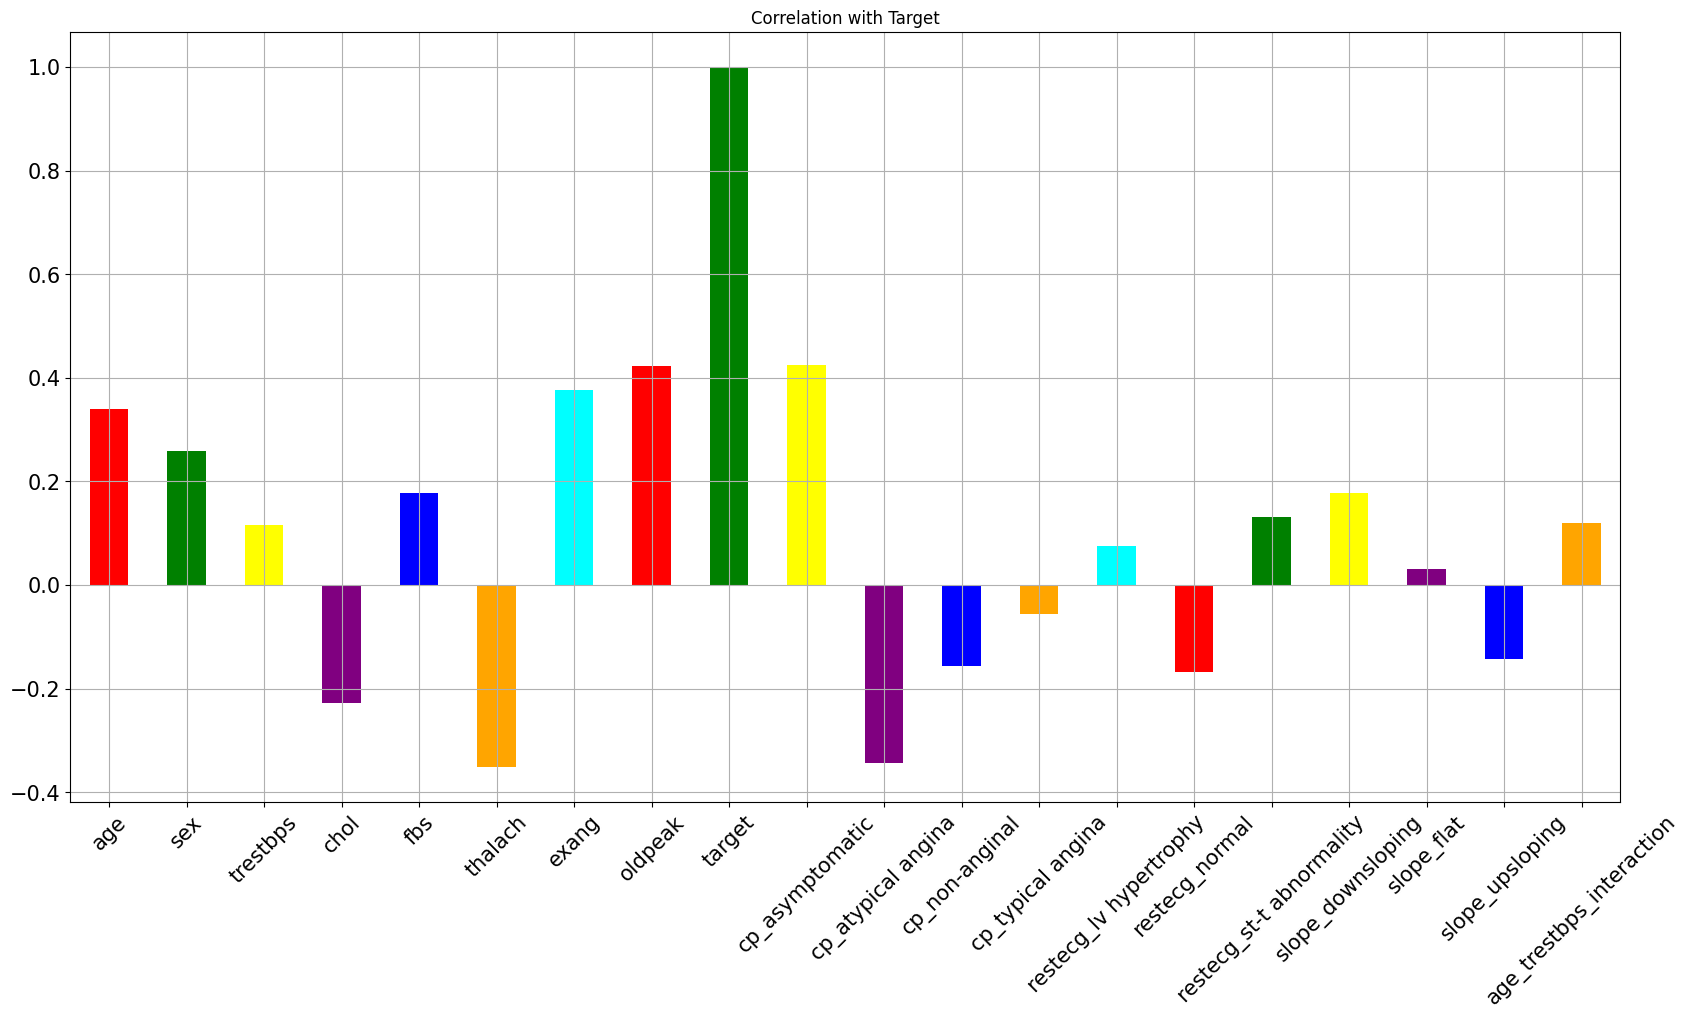

In [157]:
# Graphical representation of the correlation of the variables with target
c = ['red', 'green', 'yellow', 'purple', 'blue', 'orange', 'cyan']
heart_data.corrwith(heart_data['target']).plot.bar(figsize=(20, 10), title='Correlation with Target', fontsize=15, rot=45, grid=True, color=c)

In [104]:
# Check data types
print(X.dtypes)
print('\n')
print(y.dtypes)

# Ensure data is numeric
X = X.apply(pd.to_numeric, errors='coerce').fillna(X.mean())
y = pd.to_numeric(y, errors='coerce').fillna(y.mode()[0])

age                           int64
sex                            int8
trestbps                    float64
chol                        float64
fbs                            int8
thalach                     float64
exang                          int8
oldpeak                     float64
cp_asymptomatic                int8
cp_atypical angina             int8
cp_non-anginal                 int8
cp_typical angina              int8
restecg_lv hypertrophy         int8
restecg_normal                 int8
restecg_st-t abnormality       int8
slope_downsloping              int8
slope_flat                     int8
slope_upsloping                int8
dtype: object


int64


In [105]:
# Add Polynomial Features (Try removing this once)
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X)

In [106]:
# Ensure data is scaled
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly) # use X_poly if using polynomial features

In [64]:
# save scaler and poly
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(poly, 'poly.pkl')

['poly.pkl']

Handle class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)

In [84]:
# loading the smote module
from imblearn.over_sampling import SMOTE

# Create Test and Train and SMOTE the X Matrices
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

# dimensions of matrices
X_res.shape , y_res.shape

((2055, 209), (2055,))

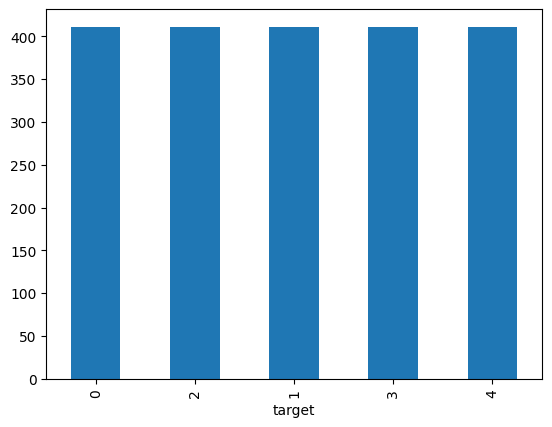

In [34]:
# distribution of target variable
y_res.value_counts().plot(kind = 'bar')
plt.show()

In [35]:
# distribution of categories of target variable
y_res.value_counts(normalize = True)

,proportion
target,
0,0.2
2,0.2
1,0.2
3,0.2
4,0.2


# Train and Test

In [107]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42, stratify=y_res)

In [114]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1644, 209), (411, 209), (1644,), (411,))

Logistic Regression

In [108]:
logreg_model = LogisticRegression(max_iter=2000, solver='lbfgs')
ovr = OneVsRestClassifier(logreg_model)

# Training the LogisticRegression model with Training data
ovr.fit(X_train, y_train)

# Evaluate model
y_pred_logreg = ovr.predict(X_test)

print("Logistic Regression Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Model Performance:
Accuracy: 0.7104622871046229
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.76        82
           1       0.56      0.50      0.53        82
           2       0.59      0.62      0.60        82
           3       0.76      0.70      0.73        83
           4       0.85      0.98      0.91        82

    accuracy                           0.71       411
   macro avg       0.71      0.71      0.71       411
weighted avg       0.71      0.71      0.71       411



In [119]:
# Hyperparameter tuning for Logistic Regression
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  # L1 = Lasso, L2 = Ridge
    'solver': ['liblinear']  # 'liblinear' supports both L1 and L2 regularization
}

grid_search = GridSearchCV(LogisticRegression(max_iter=2000), param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_logreg_model = grid_search.best_estimator_

# Evaluate the best Logistic Regression model
y_pred_logreg = best_logreg_model.predict(X_test)

print("Improved Logistic Regression Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Improved Logistic Regression Model Performance:
Accuracy: 0.7177615571776156
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.72      0.72        82
           1       0.53      0.50      0.52        82
           2       0.61      0.66      0.64        82
           3       0.80      0.71      0.75        83
           4       0.90      1.00      0.95        82

    accuracy                           0.72       411
   macro avg       0.71      0.72      0.71       411
weighted avg       0.71      0.72      0.71       411



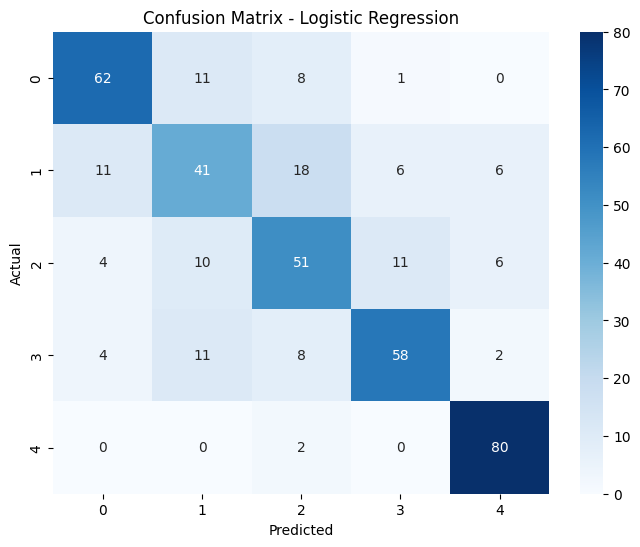

In [113]:
# Confusion Matrix
import seaborn as sns
cm_log = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

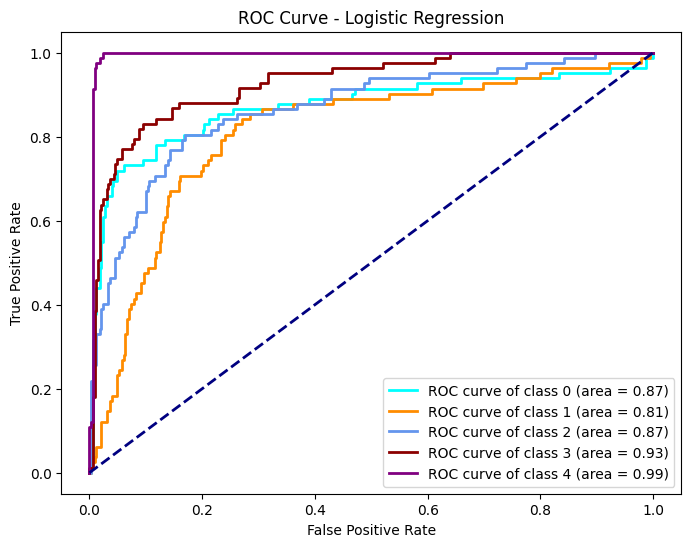

In [132]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_logreg are available
# Binarize the output labels for multiclass classification
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_binarized.shape[1]

# Assuming y_pred_logreg is the predicted probabilities
y_pred_prob = best_logreg_model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 6))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'darkred', 'purple']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"ROC curve of class {i} (area = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()


Random Forest

In [109]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the Random Forest model with Training data
rf_model.fit(X_train, y_train)

# Evaluate model
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Model Performance:
Accuracy: 0.8077858880778589
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.82      0.77        82
           1       0.65      0.52      0.58        82
           2       0.80      0.85      0.83        82
           3       0.86      0.87      0.86        83
           4       0.98      0.98      0.98        82

    accuracy                           0.81       411
   macro avg       0.80      0.81      0.80       411
weighted avg       0.80      0.81      0.80       411



In [120]:
# Hyperparameter tuning for Random Forest
# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Set up the randomized search with 100 different combinations
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid_rf, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search_rf.fit(X_train, y_train)

# Get the best estimator
best_rf_model = random_search_rf.best_estimator_

# Evaluate the improved model
y_pred_rf = best_rf_model.predict(X_test)

print("Improved Random Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Improved Random Forest Model Performance:
Accuracy: 0.8150851581508516
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.82      0.78        82
           1       0.67      0.56      0.61        82
           2       0.79      0.87      0.83        82
           3       0.89      0.87      0.88        83
           4       0.98      0.96      0.97        82

    accuracy                           0.82       411
   macro avg       0.81      0.81      0.81       411
weighted avg       0.81      0.82      0.81       411



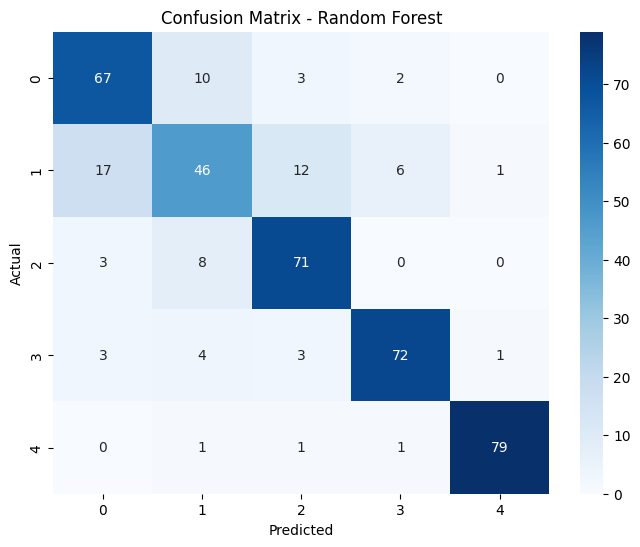

In [129]:
# Confusion Matrix
import seaborn as sns
cm_log = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Support Vector Machine (SVM)

In [110]:
svm_model = SVC(probability=True)

# Training the SVM model with Training data
svm_model.fit(X_train, y_train)

# Evaluate model
y_pred_svm = svm_model.predict(X_test)

print("SVM Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Model Performance:
Accuracy: 0.7396593673965937
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.76      0.75        82
           1       0.59      0.48      0.53        82
           2       0.73      0.68      0.70        82
           3       0.75      0.81      0.78        83
           4       0.84      0.98      0.90        82

    accuracy                           0.74       411
   macro avg       0.73      0.74      0.73       411
weighted avg       0.73      0.74      0.73       411



In [121]:
# Hyperparameter tuning for SVM
# Define the parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Set up the grid search
grid_search_svm = GridSearchCV(SVC(probability=True), param_grid=param_grid_svm, cv=5, verbose=2, n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

# Get the best estimator
best_svm_model = grid_search_svm.best_estimator_

# Evaluate the improved model
y_pred_svc = best_svm_model.predict(X_test)

print("Improved SVM Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Classification Report:\n", classification_report(y_test, y_pred_svc))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Improved SVM Model Performance:
Accuracy: 0.8223844282238443
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.74      0.71        82
           1       0.64      0.59      0.61        82
           2       0.86      0.89      0.87        82
           3       0.95      0.90      0.93        83
           4       0.98      0.99      0.98        82

    accuracy                           0.82       411
   macro avg       0.82      0.82      0.82       411
weighted avg       0.82      0.82      0.82       411



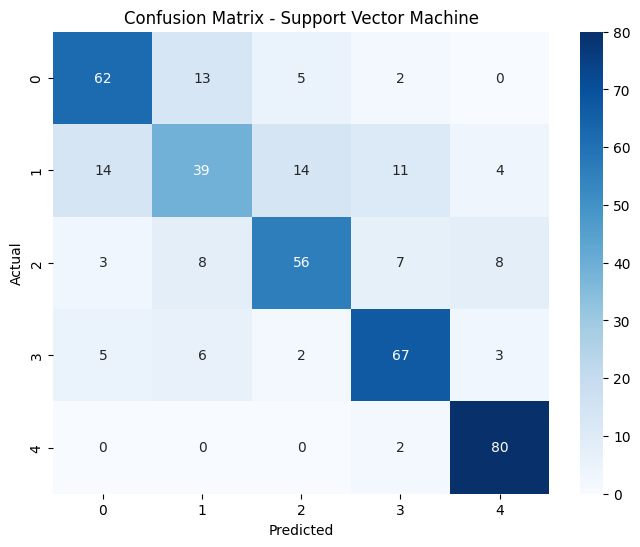

In [128]:
# Confusion Matrix
import seaborn as sns
cm_log = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Support Vector Machine")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

K-Nearest Neighbours

In [111]:
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')

# Training the KNN model with Training data
knn_model.fit(X_train, y_train)

# Evaluate model
y_pred_knn = knn_model.predict(X_test)

print("K-Nearest Neighbours Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

K-Nearest Neighbours Model Performance:
Accuracy: 0.7396593673965937
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.68      0.70        82
           1       0.55      0.49      0.52        82
           2       0.70      0.72      0.71        82
           3       0.82      0.81      0.81        83
           4       0.86      1.00      0.93        82

    accuracy                           0.74       411
   macro avg       0.73      0.74      0.73       411
weighted avg       0.73      0.74      0.73       411



In [122]:
# Hyperparameter tuning for KNN
# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_knn, cv=5, verbose=2, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

best_knn_model = grid_search_knn.best_estimator_

# Evaluate the improved KNN model
y_pred_knn = best_knn_model.predict(X_test)

print("K-Nearest Neighbors Model Performance after Hyperparameter Tuning:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
K-Nearest Neighbors Model Performance after Hyperparameter Tuning:
Accuracy: 0.805352798053528
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.68      0.74        82
           1       0.64      0.57      0.60        82
           2       0.78      0.87      0.82        82
           3       0.87      0.92      0.89        83
           4       0.91      0.99      0.95        82

    accuracy                           0.81       411
   macro avg       0.80      0.81      0.80       411
weighted avg       0.80      0.81      0.80       411



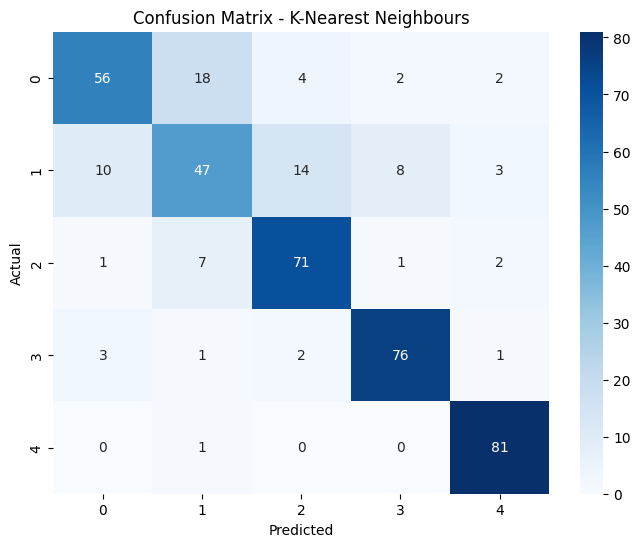

In [127]:
# Confusion Matrix
import seaborn as sns
cm_log = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - K-Nearest Neighbours")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Essembling all models in one

In [124]:
# Selecting Best Algorithm
ensemble_model = VotingClassifier(estimators=[
    ('logreg', best_logreg_model),
    ('rf', best_rf_model),
    ('svm', best_svm_model),
    ('knn', best_knn_model),
], voting='soft')

ensemble_model.fit(X_train, y_train)

# Evaluate the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test)

print("Ensemble Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ensemble))
print("Classification Report:\n", classification_report(y_test, y_pred_ensemble))

Ensemble Model Performance:
Accuracy: 0.8248175182481752
Confusion Matrix:
 [[62 17  2  1  0]
 [13 48 13  6  2]
 [ 1  6 73  0  2]
 [ 1  6  2 74  0]
 [ 0  0  0  0 82]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.76      0.78        82
           1       0.62      0.59      0.60        82
           2       0.81      0.89      0.85        82
           3       0.91      0.89      0.90        83
           4       0.95      1.00      0.98        82

    accuracy                           0.82       411
   macro avg       0.82      0.82      0.82       411
weighted avg       0.82      0.82      0.82       411



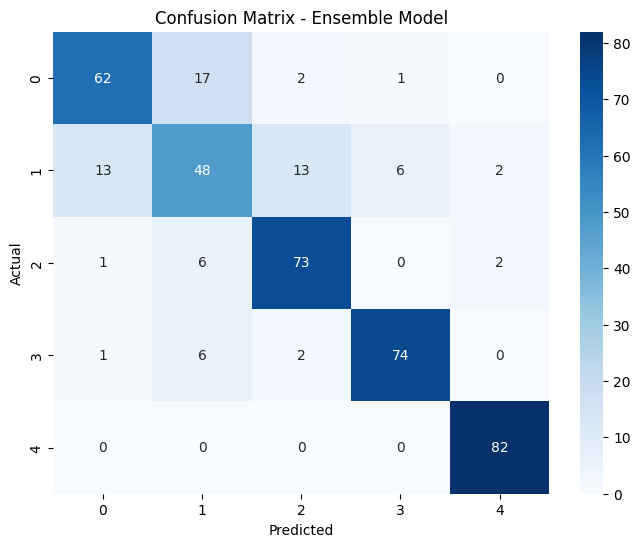

In [126]:
# Confusion Matrix
import seaborn as sns
cm_log = confusion_matrix(y_test, y_pred_ensemble)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Ensemble Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Saving Files of All Models

In [125]:
joblib.dump(best_knn_model,"LogisticRegression.pkl")
joblib.dump(best_rf_model,"RandomForest.pkl")
joblib.dump(best_svm_model,"SupportVectorMachine.pkl")
joblib.dump(best_knn_model,"KNearestNeighbors.pkl")
joblib.dump(ensemble_model,"EnsembleModel.pkl")

['EnsembleModel.pkl']

In [158]:
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(poly, 'poly.pkl')

['poly.pkl']

# Rough Codes

In [ ]:
user_input = {
    'age': float(input("Enter age: ")),
    'sex': float(input("Enter sex (0 for female, 1 for male): ")),
    'trestbps': float(input("Enter resting blood pressure: ")),
    'chol': float(input("Enter serum cholesterol: ")),
    'thalach': float(input("Enter maximum heart rate achieved: ")),
    'fbs': float(input("Enter fasting blood sugar (0 for < 120 mg/dl, 1 for > 120 mg/dl): ")),
    'exang': float(input("Enter exercise induced angina (1 for yes, 0 for no): ")),
    'oldpeak': float(input("Enter ST depression induced by exercise: ")),
    'cp': float(input("Enter chest pain type (asymptomatic, atypical angina, non-anginal, typical angina): ")),
    'restecg': float(input("Enter resting electrocardiographic results (lv hypertrophy, normal, st-t wave abnormality): ")),
    'slope': float(input("Enter the slope of the peak exercise ST segment (downsloping, flat, upsloping): "))
}

Enter age: 67
Enter sex (0 for female, 1 for male): 1
Enter resting blood pressure: 160
Enter serum cholesterol: 286
Enter maximum heart rate achieved: 108
Enter fasting blood sugar (0 for < 120 mg/dl, 1 for > 120 mg/dl): 0
Enter exercise induced angina (1 for yes, 0 for no): 1
Enter ST depression induced by exercise: 1.5
Enter chest pain type (asymptomatic, atypical angina, non-anginal, typical angina): 0
Enter resting electrocardiographic results (lv hypertrophy, normal, st-t wave abnormality): 0
Enter the slope of the peak exercise ST segment (downsloping, flat, upsloping): 1


In [ ]:
# Load your dataset
heart_data = pd.read_csv('/content/heart_disease_uci.csv')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import joblib

# Drop Columns with High Missing Values and Unwanted Columns
heart_data.drop(['id', 'dataset', 'ca', 'thal'], axis=1, inplace=True)

# Impute Missing Values for Other Columns
heart_data['trestbps'] = heart_data['trestbps'].fillna(heart_data['trestbps'].mean())
heart_data['chol'] = heart_data['chol'].fillna(heart_data['chol'].mean())
heart_data['fbs'] = heart_data['fbs'].fillna(heart_data['fbs'].mean())
heart_data['thalach'] = heart_data['thalach'].fillna(heart_data['thalach'].mean())
heart_data['exang'] = heart_data['exang'].fillna(heart_data['exang'].mean())
heart_data['oldpeak'] = heart_data['oldpeak'].fillna(heart_data['oldpeak'].mean())

# Handle Missing Values in Categorical Columns
heart_data['slope'] = heart_data['slope'].fillna(heart_data['slope'].mode()[0])

# Normalize or Standardize Numerical Columns
scaler = StandardScaler()
heart_data[['trestbps', 'chol', 'thalach']] = scaler.fit_transform(heart_data[['trestbps', 'chol', 'thalach']])

# Convert categorical variables into numerical values using one-hot encoding
heart_data = pd.get_dummies(heart_data, columns=['cp', 'restecg', 'slope'])

# Convert any remaining object and boolean columns to numeric
for col in heart_data.select_dtypes(include=['object', 'bool']).columns:
    heart_data[col] = heart_data[col].astype('category').cat.codes

# Feature Engineering Example
heart_data['age_trestbps_interaction'] = heart_data['age'] * heart_data['trestbps']

# Prepare the data
X = heart_data.drop('target', axis=1)
y = heart_data['target']

# Keep track of feature names
original_feature_names = X.columns.tolist()

# Add Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X)
poly_feature_names = poly.get_feature_names_out(original_feature_names)

# Ensure data is scaled
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

# Convert X_train to DataFrame to maintain columns
X_train_df = pd.DataFrame(X_train, columns=poly_feature_names)

# Fit the model (Example: Logistic Regression)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Save the model and fitted scaler/poly
joblib.dump(model, 'heart_disease_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(poly, 'poly.pkl')
joblib.dump(X_train_df.columns.tolist(), 'poly_feature_names.pkl')


['poly_feature_names.pkl']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import joblib

# 1. Load the Dataset
df = pd.read_csv('heart_disease_uci.csv')

# 2. Preprocessing

# Drop irrelevant columns
df.drop(['id', 'ca', 'thal', 'dataset'], axis=1, inplace=True)

# Handle missing values (numerical: fill with mean, categorical: fill with mode)
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].mean())

for col in df.select_dtypes(include=['object', 'bool']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Encode categorical features
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
encoder = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoder[col] = le

# Split data into features and target
X = df.drop('target', axis=1)
y = df['target']

# Scale numerical features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Train Model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# 5. Evaluate Model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Save the model and preprocessing objects
joblib.dump(model, 'heart_disease_model_simple.pkl')
joblib.dump(scaler, 'scaler_simple.pkl')
joblib.dump(encoder, 'encoder_simple.pkl')

# 6. Prediction Function
def predict_heart_disease(user_input):
    # Convert input to DataFrame
    input_df = pd.DataFrame(user_input, index=[0])

    # Encode categorical inputs
    for col, le in encoder.items():
        if col in input_df.columns:
            input_df[col] = le.transform(input_df[col])

    # Scale numerical inputs
    input_df = scaler.transform(input_df)

    # Predict
    prediction = model.predict(input_df)[0]
    target_labels = ["Healthy", "Early Stage", "Mild Symptoms", "Advanced Warning", "Severe"]
    return target_labels[int(prediction)]

# 7. Example Usage
user_input = {
    'age': 55,
    'sex': 1,  # 0 for female, 1 for male
    'trestbps': 140,  # resting blood pressure
    'chol': 240,  # serum cholesterol
    'thalach': 150,  # maximum heart rate achieved
    'fbs': 0,  # fasting blood sugar: 0 for < 120 mg/dl, 1 for > 120 mg/dl
    'exang': 1,  # exercise induced angina: 1 for yes, 0 for no
    'oldpeak': 2.3,  # ST depression induced by exercise
    'cp': 'typical angina',  # chest pain type
    'restecg': 'normal',  # resting electrocardiographic results
    'slope': 'flat'  # slope of the peak exercise ST segment
}

# Make prediction
print("Prediction:", predict_heart_disease(user_input))

Accuracy: 0.592391304347826

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.90      0.83        82
           1       0.49      0.57      0.53        53
           2       0.57      0.18      0.28        22
           3       0.05      0.05      0.05        21
           4       0.00      0.00      0.00         6

    accuracy                           0.59       184
   macro avg       0.38      0.34      0.34       184
weighted avg       0.56      0.59      0.56       184



<ipython-input-356-5b0f3d3e1f4f>:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/pyth

ValueError: y contains previously unseen labels: 1